In [15]:
#Loading libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [16]:
#loading data files
players_url <- "https://raw.githubusercontent.com/anniema5616/individual_planning_report/refs/heads/main/players.csv"
players_data <- read_csv(players_url) 
players_data

sessions_url <- "https://raw.githubusercontent.com/anniema5616/individual_planning_report/refs/heads/main/sessions.csv"
sessions_data <- read_csv(sessions_url)
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [17]:
#wranging data
amateur_data <- filter(players_data, experience=="Amateur")|>
    select(experience)
amateur_data

beginner_data <- filter(players_data, experience=="Beginner")|> 
    select(experience)
beginner_data 

regular_data <- filter(players_data, experience=="Regular") |>
    select(experience)
regular_data

veteran_data <- filter(players_data, experience=="Veteran")|>
    select(experience)
veteran_data

pro_data <- filter(players_data, experience=="Pro")|>
    select(experience)
pro_data

subscriber_data <- filter(players_data, subscribe=="TRUE")|>
    select(subscribe)
subscriber_data

nonsubscriber_data <-filter(players_data, subscribe=="FALSE")|>
    select(subscribe)
nonsubscriber_data

experience
<chr>
Amateur
Amateur
Amateur
⋮
Amateur
Amateur
Amateur


experience
<chr>
Beginner
Beginner
Beginner
⋮
Beginner
Beginner
Beginner


experience
<chr>
Regular
Regular
Regular
⋮
Regular
Regular
Regular


experience
<chr>
Veteran
Veteran
Veteran
⋮
Veteran
Veteran
Veteran


experience
<chr>
Pro
Pro
Pro
⋮
Pro
Pro
Pro


subscribe
<lgl>
TRUE
TRUE
TRUE
⋮
TRUE
TRUE
TRUE


subscribe
<lgl>
FALSE
FALSE
FALSE
⋮
FALSE
FALSE
FALSE


In [18]:
#Calculated Means
age_average <- players_data |>
    summarise(mean_age=mean(Age, na.rm=TRUE))
age_average

played_hours_average <- players_data |>
    summarise(mean_played_hours=mean(played_hours, na.rm=TRUE))
played_hours_average

mean_age
<dbl>
20.52062


mean_played_hours
<dbl>
5.845918


In [19]:
#wrangling data for specific question
players_data_clean <- players_data |>
    select(experience, played_hours, subscribe) |>
    mutate(experience= factor(experience, levels = c("Beginner", "Amateur","Regular","Pro", "Veteran"),
                              ordered =TRUE)) |>
    filter(!is.na(experience))
players_data_clean

experience,played_hours,subscribe
<ord>,<dbl>,<lgl>
Pro,30.3,TRUE
Veteran,3.8,TRUE
Veteran,0.0,FALSE
⋮,⋮,⋮
Amateur,0.0,FALSE
Amateur,2.3,FALSE
Pro,0.2,TRUE


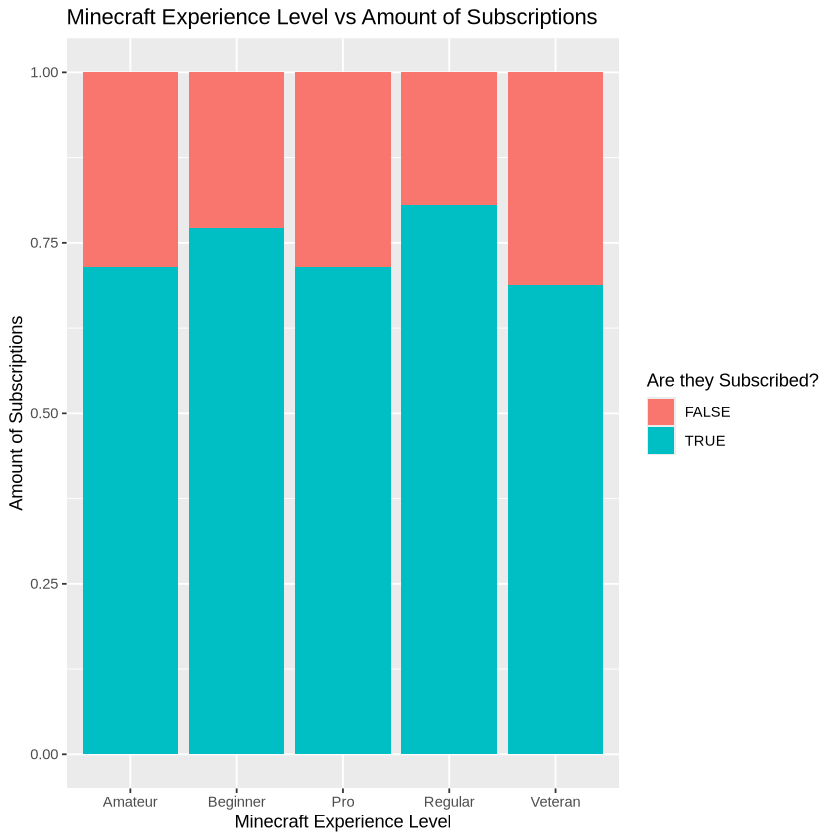

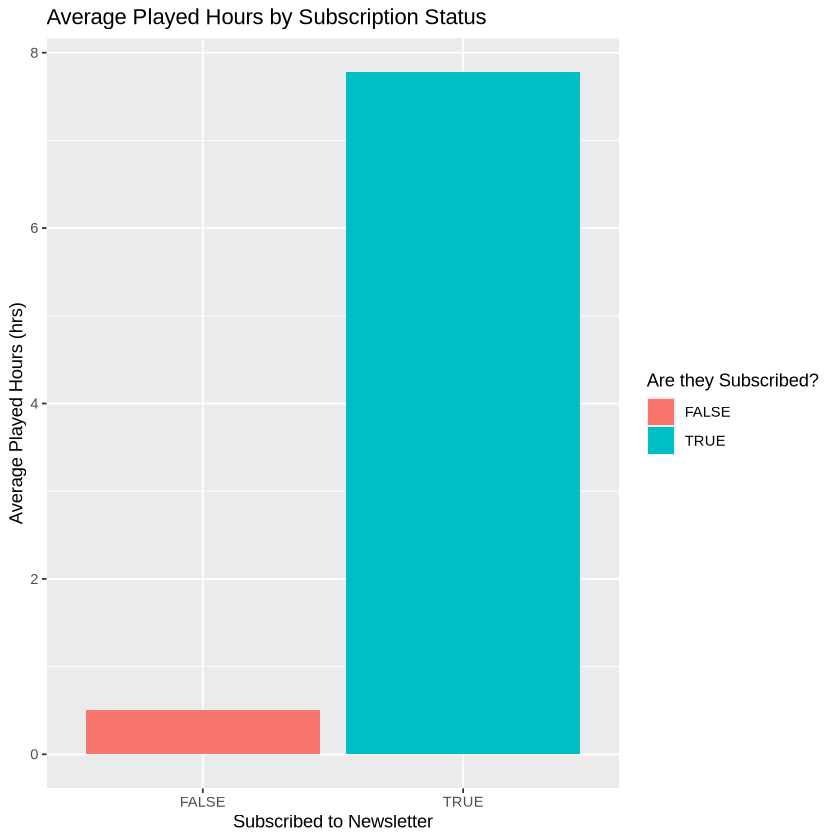

In [20]:
#exploratory visualizations
experience_vs_subscription_bar_plot <- players_data |>
    ggplot(aes(x=experience, fill=subscribe))+
    geom_bar(position="fill")+
    labs(title= "Minecraft Experience Level vs Amount of Subscriptions",
         x= "Minecraft Experience Level",
         y= "Amount of Subscriptions",
        fill= "Are they Subscribed?")
experience_vs_subscription_bar_plot

hours_played_avg <- players_data_clean |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

hours_vs_subscribe_plot <- ggplot(hours_played_avg, aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours by Subscription Status",
    x = "Subscribed to Newsletter",
    y = "Average Played Hours (hrs)",
    fill = "Are they Subscribed?")
hours_vs_subscribe_plot

### **Data Description**

#### Number of Recorded Observations
- 196 Players
- 1535 Plays

#### Variables:
|Name| Type|Meaning|
|:----------:|:---------:|:----|
|experience|Character|Minecraft Experience Level|
|subscribe|Logical|Whether Players are Subscribed or not|
|hashedEmail|Character|Recorded Email|
|played_hours|Double Precision|Amount of Played Hours|
|name|Character|Player's Name|
|gender|Character|Player's Gender|
|Age| Double Precision| Player's Age|
|start_time|Character|Start time of Play|
|end_time|Character|End time of Play|
|original_start_time| Double Precision|Start time of Play (Scientific Notation)|
|original_end_time| Double Precision|End time of Play (Scientific Notation)|

#### Summary Statistics
|Variable| Mean Value|
|:----------:|:---------:|
|Age|20.52062|
|played_hours|5.845918|

#### Subscriber Status
|Status| Amount of Players|
|:----------:|:---------:|
|Not Subscribed|52|
|Subscribed|144|

#### Amount of Players in Each Minecraft Experience Level
|Experience| Players|
|:----------:|:---------:|
|Beginner|35|
|Amateur|63|
|Regular|36|
|Pro|14|
|Veteran|48|


#### Possible Issues
- certain variables are marked as NA

### **Questions**
#### Broad:  
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific:  
Can experience in Minecraft and amount played hours predict whether a player subscribes to a game-related newsletter in the players.csv dataset?

#### Data Wrangling
Experience and played_hours can be used as predictors to classify the discrete value for the variable subscribe. Experience can be ordered from lowest level of experience to highest while played_hours can be numerically ordered. Any observations with missing values from the variables can be removed from the data set. 


### **Exploratory Data Analysis and Visualization**
When observing the "Minecraft Experience Level vs Amount of Subscriptions" graph, a conclusion is made that there is no relevant relationship between the number of subscriptions and the level of experience in Minecraft because subscriptions stay almost constant throughout all experience levels.
When observing the "Average Played Hours by Subscription Status" graph, a conclusion that there is a positive relationship between the number of hours played and the amount of subscriptions because the more hours played, the more subscriptions there are by players.

### **Methods and Plan**
Using classification on the players.csv dataset can help predict whether players are likely to subscribe or not to game-related newsletters because the variable subscribe is discrete. Regression would not be the best choice because the variables being compared are not all numerical values, thus a regression model would not best represent the data to answer the question. An assumption to make when classifying this dataset is to assume that the predictor variables are independent of each other. A possible weakness could be a lack of data points to capture all patterns and too many random errors in the data. To compare and select the model, the target variable type must be observed. If the target variable is categorical/ discrete, classification should be used, while a continuous target, often numerical, should use regression. The data will be split into two sets with 70% for training and 30% for testing. The dataset can be split after cleaning and before modelling. A 5-fold cross-validation can be used within the training set to reduce possible overfitting.

